# Problem 2.13

## Part a.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def random_percolation_lattice(L, p):
    # Start with an empty graph.
    graph = {(i, j): [] for i in range(L) for j in range(L)}
    
    # Walk through each node and sample whether or not to draw an edge.
    # Due to the periodic boundary conditions, we can sample only the
    # lower and right edges so that we don't double count.
    for i in range(L):
        for j in range(L):
            # See if we draw an edge to the right node.
            if np.random.random() <= p:
                i_right = (i + 1) % L
                graph[i, j].append((i_right, j))
                graph[(i_right, j)].append((i, j))
            
            # See if we draw an edge to the downward node.
            if np.random.random() <= p:
                j_down = (j + 1) % L
                graph[i, j].append((i, j_down))
                graph[i, j_down].append((i, j))
    
    return graph

In [3]:
graph = random_percolation_lattice(L=10, p=0.5)

In [5]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray']

In [8]:
def draw_lattice(graph):
    """Draw the lattice via a depth-first search."""
    plt.figure(figsize=(8, 8))
    coords = np.array(list(graph.keys()))
    plt.scatter(coords[:, 0], coords[:, 1])
    
    visited_nodes = set()
    
    for i, node in enumerate(graph.keys()):
        queue = [node]
        color = colors[i % len(colors)]
        while queue:
            cur_node = queue.pop()
            visited_nodes.add(cur_node)
            
            for neighbor in graph[cur_node]:
                if neighbor in visited_nodes:
                    continue
                    
                queue.append(neighbor)
                
                if abs(neighbor[0] - cur_node[0]) <= 1 and abs(neighbor[1] - cur_node[1]) <= 1:
                    x0 = cur_node[0]
                    x1 = neighbor[0]
                    y0 = cur_node[1]
                    y1 = neighbor[1]
                    
                    overflow = False
                elif neighbor[0] - cur_node[0] > 1:
                    x0 = cur_node[0]
                    x1 = cur_node[0] - 1
                    y0 = cur_node[1]
                    y1 = neighbor[1]
                    
                    overflow = True
                    x2_0 = neighbor[0]
                    x2_1 = neighbor[0] + 1
                    y2_0 = cur_node[1]
                    y2_1 = cur_node[1]
                elif cur_node[0] - neighbor[0] > 1:
                    x0 = cur_node[0]
                    x1 = cur_node[0] + 1
                    y0 = cur_node[1]
                    y1 = neighbor[1]
                    
                    overflow = True
                    x2_0 = neighbor[0]
                    x2_1 = neighbor[0] - 1
                    y2_0 = cur_node[1]
                    y2_1 = cur_node[1]
                elif neighbor[1] - cur_node[1] > 1:
                    x0 = cur_node[0]
                    x1 = cur_node[0]
                    y0 = cur_node[1]
                    y1 = cur_node[1] - 1
                    
                    overflow = True
                    x2_0 = neighbor[0]
                    x2_1 = neighbor[0]
                    y2_0 = neighbor[1]
                    y2_1 = neighbor[1] + 1
                elif cur_node[1] - neighbor[1] > 1:
                    x0 = cur_node[0]
                    x1 = cur_node[0]
                    y0 = cur_node[1]
                    y1 = cur_node[1] + 1
                    
                    overflow = True
                    x2_0 = neighbor[0]
                    x2_1 = neighbor[0]
                    y2_0 = neighbor[1]
                    y2_1 = neighbor[1] - 1
                
                plt.plot([x0, x1], [y0, y1], c=color)
                if overflow:
                    plt.plot([x2_0, x2_1], [y2_0, y2_1], c=color)       
    
    L = int(np.sqrt(len(graph)))
    plt.xlim([-0.5, L - 0.5])
    plt.ylim([-0.5, L - 0.5])
    
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

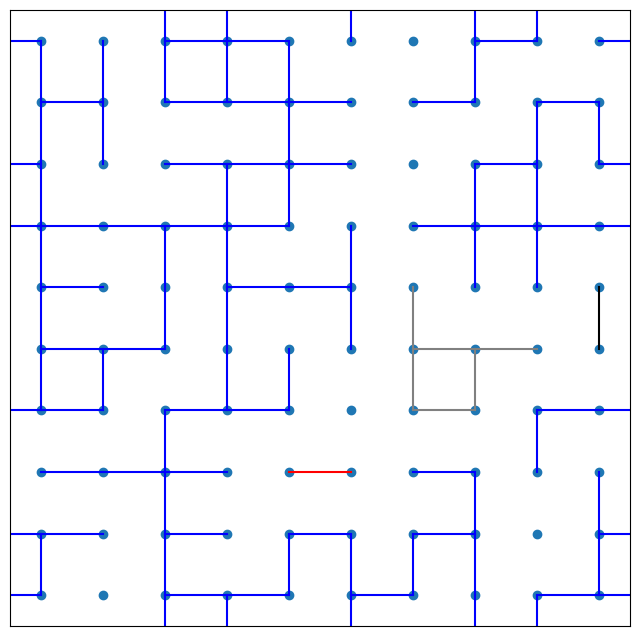

In [9]:
draw_lattice(graph)

## Part b.

In [10]:
graph = random_percolation_lattice(L=10, p=0.4)

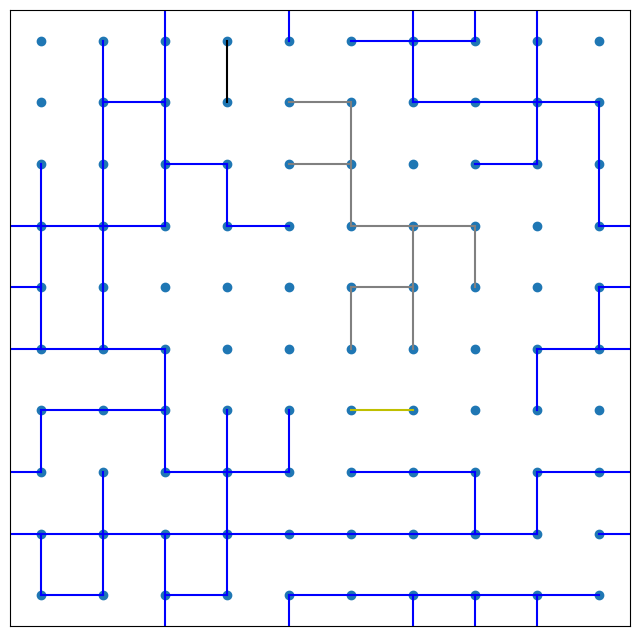

In [11]:
draw_lattice(graph)

In [14]:
graph = random_percolation_lattice(L=200, p=0.5)

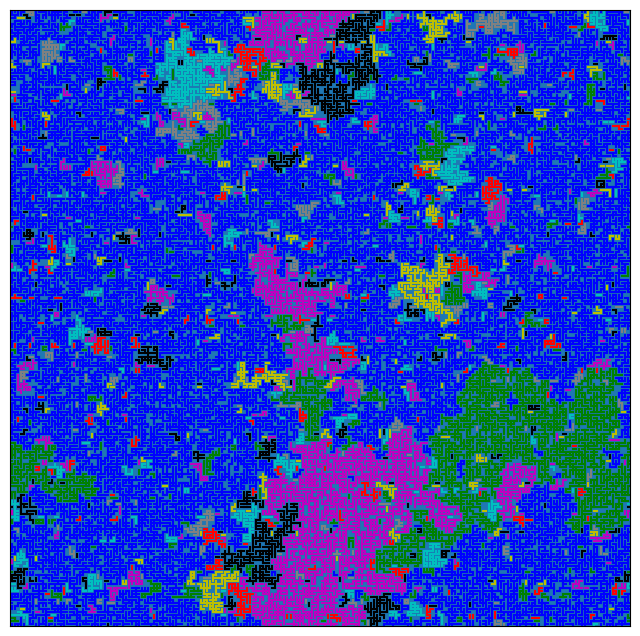

In [15]:
draw_lattice(graph)